# Pan Cancer EGFR 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
#sys.path.append('C:\\Users\\brittany henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f

import cptac
import cptac.utils as u

cptac warning: Your version of cptac (0.7.1) is out-of-date. Latest is 0.7.2. Please run 'pip install --upgrade cptac' to update it. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 11)


In [51]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [159]:
newdf = pd.DataFrame(columns=['Cancer','Correlation','P_value'])

# GBM

In [2]:
brain = cptac.Gbm()


cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


In [64]:
prot_CNV_brain = brain.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV_brain = prot_CNV_brain[["EGFR_proteomics","EGFR_CNV"]]
mutation = brain.get_clinical()
#do a linear regression to see if it's a meaningful association
#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
mergedDf = prot_CNV_brain.merge(mutation, on="Patient_ID")
df1 = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
df1 = df1[["EGFR_proteomics","EGFR_CNV","Sample_Tumor_Normal"]]
df1 = df1.dropna(axis=0, how="any")

x1 = df1[["EGFR_CNV"]].values
y1 = df1[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

corr, pval = scipy.stats.pearsonr(x1,y1)
comparisons.append(inter_gene)
        pvals.append(pval)
        correlation.append(corr)


cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834, PT-NPJ7.N, PT-P44H.N, PT-Q2AG.N, PT-QVJO.N, PT-R55F.N, PT-RN5K.N, PT-RU72.N, PT-UTHO.N, PT-WVLH.N, PT-Y8DK.N (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


In [57]:
df1

Name,EGFR_proteomics,EGFR_CNV,Sample_Tumor_Normal
Patient_ID,,,
C3L-00104,1.054962,1.059405,Tumor
C3L-00365,2.219562,4.071536,Tumor
C3L-00674,0.137329,3.483884,Tumor
C3L-00677,-0.768478,0.458499,Tumor
C3L-01040,-1.249435,0.360617,Tumor
...,...,...,...
C3N-03183,0.356865,1.847881,Tumor
C3N-03184,1.623039,4.364630,Tumor
C3N-03186,-0.381447,0.291200,Tumor


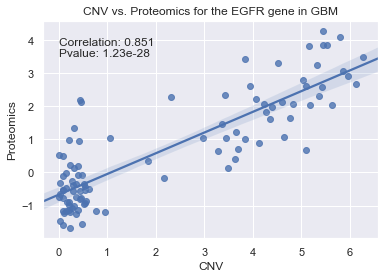

In [65]:
# plot 
sns.set(style="darkgrid")

plot = sns.regplot(x=x1, y=y1, data=df1)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in GBM')
pval = myTrunc(pval,30)
corr = myTrunc(corr,3)
plt.text(0,3.5, "Correlation: %s\nPvalue: %s"%(corr,pval))
plt.savefig('EGFR_CNV.png')        
plt.show()


# Kidney 

In [37]:
kidney = cptac.Ccrcc()


In [74]:
prot_CNV_kidney = kidney.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV_kidney = prot_CNV_kidney[["EGFR_proteomics","EGFR_CNV"]]
prot_CNV_kidney.columns = prot_CNV_kidney.columns.droplevel(1)
mutation = kidney.get_clinical()
prot_CNV_kidney
#do a linear regression to see if it's a meaningful association
#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
mergedDf = prot_CNV_kidney.merge(mutation, on="Patient_ID")
df1 = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
df1 = df1[["EGFR_proteomics","EGFR_CNV","Sample_Tumor_Normal"]]
df1 = df1.dropna(axis=0, how="any")
df1
x1 = df1[["EGFR_CNV"]].values
y1 = df1[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

corr, pval = scipy.stats.pearsonr(x1,y1)

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00004.N, C3L-00010.N, C3L-00011.N, C3L-00026.N, C3L-00079.N, C3L-00088.N, C3L-00096.N, C3L-00097.N, C3L-00103.N, C3L-00183.N, C3L-00360.N, C3L-00369.N, C3L-00416.N, C3L-00418.N, C3L-00447.N, C3L-00448.N, C3L-00561.N, C3L-00581.N, C3L-00583.N, C3L-00606.N, C3L-00607.N, C3L-00791.N, C3L-00814.N, C3L-00902.N, C3L-00907.N, C3L-00908.N, C3L-00910.N, C3L-00917.N, C3L-01281.N, C3L-01286.N, C3L-01287.N, C3L-01302.N, C3L-01313.N, C3L-01603.N, C3L-01607.N, C3L-01836.N, C3L-01861.N, C3L-01882.N, C3L-01885.N, C3N-00148.N, C3N-00149.N, C3N-00150.N, C3N-00168.N, C3N-00177.N, C3N-00194.N, C3N-00242.N, C3N-00244.N, C3N-00246.N, C3N-00310.N, C3N-00312.N, C3N-00314.N, C3N-00317.N, C3N-00320.N, C3N-00390.N, C3N-00435.N, C3N-00437.N, C3N-00491.N, C3N-00492.N, C3N-00494.N, C3N-00495.N, C3N-00573.N, C3N-00577.N, C3N-00646.N, C3N-00733.N, C3N-00831.N, C3N-00834.N, C3N-00852.N, C3N-

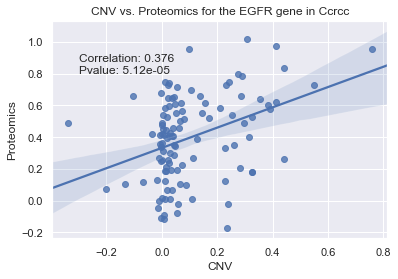

In [75]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df1)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Ccrcc')
pval = myTrunc(pval,7)
corr = myTrunc(corr,3)
plt.text(-0.3,.8, "Correlation: %s\nPvalue: %s"%(corr,pval))
plt.savefig('EGFR_CNV_Ccrcc.png')   
plt.show()

# Ovarian 

In [76]:
Ovar = cptac.Ovarian()

In [79]:
prot_CNV_ovar = Ovar.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV_ovar = prot_CNV_ovar[["EGFR_proteomics","EGFR_CNV"]]
prot_CNV_ovar.columns = prot_CNV_ovar.columns.droplevel(1)
mutation = Ovar.get_clinical()

#do a linear regression to see if it's a meaningful association
#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 01OV007.N, 01OV008.N, 01OV010.N, 01OV013.N, 01OV017.N, 01OV019.N, 01OV023.N, 01OV029, 01OV029.N, 01OV039.N, 02OV001.N, 02OV015, 11OV002.N, 11OV010.N, 14OV011.N, 14OV029.N, 15OV001.N, 17OV001.N, 17OV002.N, 17OV003.N, 17OV004.N, 17OV005.N (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01OV002, 01OV008, 01OV010, 01OV013, 01OV019, 01OV045, 01OV046, 01OV049, 02OV035, 02OV040, 02OV042, 02OV045, 04OV041, 11OV009, 13OV004, 17OV019, 17OV034, 22OV001, 26OV010 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


In [80]:

mergedDf = prot_CNV_ovar.merge(mutation, on="Patient_ID")
df1 = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
df1 = df1[["EGFR_proteomics","EGFR_CNV","Sample_Tumor_Normal"]]
df1 = df1.dropna(axis=0, how="any")
df1
x1 = df1[["EGFR_CNV"]].values
y1 = df1[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

corr, pval = scipy.stats.pearsonr(x1,y1)

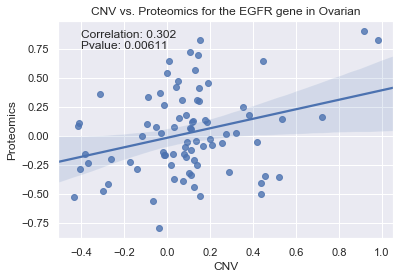

In [83]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df1)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Ovarian')
pval = myTrunc(pval,5)
corr = myTrunc(corr,3)
plt.text(-0.4,.75, "Correlation: %s\nPvalue: %s"%(corr,pval))
plt.savefig('EGFR_CNV_Ovar.png')   
plt.show()

# Colon

In [86]:
colon = cptac.Colon()

In [94]:
prot_CNV_colon = colon.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV = prot_CNV_colon[["EGFR_proteomics","EGFR_CNV"]]
#prot_CNV.columns = prot_CNV.columns.droplevel(1)
mutation = colon.get_clinical()

#do a linear regression to see if it's a meaningful association
#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan


cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 01CO001.N, 01CO005.N, 01CO006.N, 01CO008.N, 01CO013.N, 01CO014.N, 01CO015.N, 01CO019.N, 01CO022.N, 05CO002.N, 05CO003.N, 05CO006.N, 05CO007.N, 05CO011.N, 05CO015.N, 05CO020.N, 05CO026.N, 05CO028.N, 05CO029.N, 05CO032.N, 05CO033.N, 05CO034.N, 05CO035.N, 05CO037.N, 05CO039.N, 05CO041.N, 05CO044.N, 05CO045, 05CO045.N, 05CO047.N, 05CO048.N, 05CO049.N, 05CO050.N, 05CO053.N, 05CO054.N, 06CO001.N, 06CO002.N, 09CO005.N, 09CO006.N, 09CO008.N, 09CO011.N, 09CO013.N, 09CO014.N, 09CO015.N, 09CO018.N, 09CO019.N, 09CO022.N, 11CO005.N, 11CO007.N, 11CO008.N, 11CO010.N, 11CO018.N, 11CO019.N, 11CO020.N, 11CO021.N, 11CO022.N, 11CO027.N, 11CO030.N, 11CO031.N, 11CO032.N, 11CO033.N, 11CO036.N, 11CO037.N, 11CO039.N, 11CO042.N, 11CO043.N, 11CO044.N, 11CO045.N, 11CO047.N, 11CO048.N, 11CO051.N, 11CO052.N, 11CO053.N, 11CO054.N, 11CO057.N, 11CO058.N, 11CO060.N, 11CO061.N, 11CO062.N, 11CO070.

Name,Sample_Tumor_Normal,Age,CEA,Gender,Lymphatic_Invasion,Mucinous,Perineural_Invasion,Polyps_History,Polyps_Present,Stage,Subsite,Synchronous_Tumors,Tumor.Status,Vascular_Invasion,Vital.Status,pathalogy_N_stage,pathalogy_T_stage
Patient_ID,,,,,,,,,,,,,,,,,
01CO001,Tumor,729.0,4.9,Male,Yes,Mucinous,No,No,No,Stage III,Sigmoid Colon,No,Tumor free,Yes,Living,N2b,T4a
01CO005,Tumor,838.0,1.0,Female,No,Not Mucinous,No,Yes,Yes,Stage II,Sigmoid Colon,No,Tumor free,No,Deceased,N0,T3
01CO006,Tumor,904.0,NaN,Female,Yes,Mucinous,Yes,No,No,Stage III,Ascending Colon,Yes,With tumor,Yes,Living,N2b,T4a
01CO008,Tumor,652.0,NaN,Female,No,Mucinous,No,No,Yes,Stage II,Descending Colon,No,With tumor,No,Living,N0,T3
01CO013,Tumor,695.0,NaN,Male,No,Not Mucinous,No,Yes,No,Stage I,Sigmoid Colon,No,Tumor free,No,Living,N0,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21CO006.N,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21CO007.N,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22CO004.N,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:

mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
df1 = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
df1 = df1[["EGFR_proteomics","EGFR_CNV","Sample_Tumor_Normal"]]
df1 = df1.dropna(axis=0, how="any")
df1


Name,EGFR_proteomics,EGFR_CNV,Sample_Tumor_Normal
Patient_ID,,,
01CO005,-0.1540,0.972,Tumor
01CO006,0.0916,0.044,Tumor
01CO008,-0.3250,0.403,Tumor
01CO013,-0.5470,0.470,Tumor
01CO014,0.0184,0.113,Tumor
...,...,...,...
21CO006,-0.0624,0.634,Tumor
21CO007,-0.0125,1.624,Tumor
22CO004,-0.5250,0.698,Tumor


In [97]:
x1 = df1[["EGFR_CNV"]].values
y1 = df1[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

corr, pval = scipy.stats.pearsonr(x1,y1)

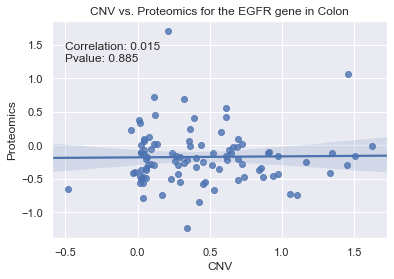

In [100]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df1)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Colon')
pval = myTrunc(pval,3)
corr = myTrunc(corr,3)
plt.text(-0.5,1.25, "Correlation: %s\nPvalue: %s"%(corr,pval))
plt.savefig('EGFR_CNV_colon.png')   
plt.show()

# Brca 

In [101]:
brca = cptac.Brca()

In [115]:
prot_CNV = brca.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV = prot_CNV[["EGFR_proteomics","EGFR_CNV"]]
prot_CNV.columns = prot_CNV.columns.droplevel(1)
mutation = brca.get_clinical()
prot_CNV

Name,EGFR_proteomics,EGFR_CNV
Patient_ID,,
CPT000814,-0.4834,-0.471
CPT001846,4.1062,1.288
X01BR001,1.2191,2.199
X01BR008,0.0613,0.114
X01BR009,1.6974,0.582
...,...,...
X21BR001,-1.5217,-0.099
X21BR002,-0.9455,0.016
X21BR010,-0.7098,0.291


In [116]:
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
df1 = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
df1 = df1[["EGFR_proteomics","EGFR_CNV","Sample_Tumor_Normal"]]
df1 = df1.dropna(axis=0, how="any")
df1

Name,EGFR_proteomics,EGFR_CNV,Sample_Tumor_Normal
Patient_ID,,,
CPT000814,-0.4834,-0.471,Tumor
CPT001846,4.1062,1.288,Tumor
X01BR001,1.2191,2.199,Tumor
X01BR008,0.0613,0.114,Tumor
X01BR009,1.6974,0.582,Tumor
...,...,...,...
X21BR001,-1.5217,-0.099,Tumor
X21BR002,-0.9455,0.016,Tumor
X21BR010,-0.7098,0.291,Tumor


In [117]:
x1 = df1[["EGFR_CNV"]].values
y1 = df1[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

corr, pval = scipy.stats.pearsonr(x1,y1)

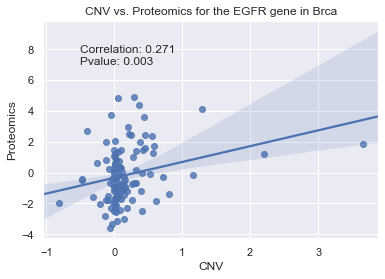

In [118]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df1)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Brca')
pval = myTrunc(pval,3)
corr = myTrunc(corr,3)
plt.text(-0.5,7, "Correlation: %s\nPvalue: %s"%(corr,pval))
plt.savefig('EGFR_CNV_Brca.png')   
plt.show()

# LUAD

In [110]:
luad = cptac.Luad()

cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


In [127]:
prot_CNV = luad.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV = prot_CNV[["EGFR_proteomics","EGFR_CNV"]]
prot_CNV.columns = prot_CNV.columns.droplevel(1)
mutation = luad.get_clinical()

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00001.N, C3L-00009.N, C3L-00080.N, C3L-00083.N, C3L-00093.N, C3L-00094.N, C3L-00095.N, C3L-00140.N, C3L-00144.N, C3L-00263.N, C3L-00279.N, C3L-00368.N, C3L-00412.N, C3L-00422.N, C3L-00510.N, C3L-00604.N, C3L-00893.N, C3L-00913.N, C3L-00973.N, C3L-01330.N, C3L-01632.N, C3L-01682.N, C3L-01683.N, C3L-01889.N, C3L-01890, C3L-01890.N, C3L-01924.N, C3L-02219.N, C3L-02345.N, C3L-02348.N, C3L-02350.N, C3L-02365.N, C3L-02508.N, C3L-02549.N, C3N-00167.N, C3N-00169.N, C3N-00175.N, C3N-00180.N, C3N-00199.N, C3N-00203.N, C3N-00217.N, C3N-00223.N, C3N-00293.N, C3N-00433.N, C3N-00546.N, C3N-00547.N, C3N-00549.N, C3N-00550.N, C3N-00551.N, C3N-00552.N, C3N-00556.N, C3N-00559.N, C3N-00560.N, C3N-00572.N, C3N-00574.N, C3N-00578.N, C3N-00579.N, C3N-00580.N, C3N-00704.N, C3N-00737.N, C3N-00738.N, C3N-00959.N, C3N-01016.N, C3N-01021.N, C3N-01023.N, C3N-01024.N, C3N-01030.N, C3N-01

In [128]:
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
df1 = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
df1 = df1[["EGFR_proteomics","EGFR_CNV","Sample_Tumor_Normal"]]
df1 = df1.dropna(axis=0, how="any")
df1

Name,EGFR_proteomics,EGFR_CNV,Sample_Tumor_Normal
Patient_ID,,,
C3L-00001,7.5892,2.3242,Tumor
C3L-00009,-1.8777,0.0730,Tumor
C3L-00080,-1.2350,0.1973,Tumor
C3L-00083,-2.8551,0.0037,Tumor
C3L-00093,-1.9872,0.2556,Tumor
...,...,...,...
C3N-02729,0.6061,0.2633,Tumor
X11LU013,5.1657,4.1857,Tumor
X11LU016,0.6080,0.3967,Tumor


In [129]:
x1 = df1[["EGFR_CNV"]].values
y1 = df1[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

corr, pval = scipy.stats.pearsonr(x1,y1)

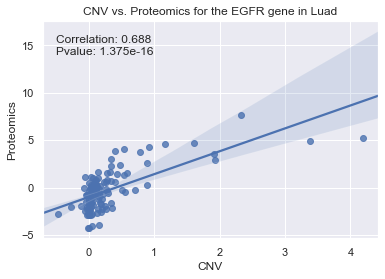

In [133]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df1)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Luad')
pval = myTrunc(pval,19)
corr = myTrunc(corr,3)
plt.text(-0.5,14, "Correlation: %s\nPvalue: %s"%(corr,pval))
plt.savefig('EGFR_CNV_Luad.png')   
plt.show()

# HNSCC

In [134]:
Hnscc = cptac.Hnscc()

In [144]:
prot_CNV = Hnscc.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV = prot_CNV[["EGFR_proteomics","EGFR_CNV"]]
#prot_CNV.columns = prot_CNV.columns.droplevel(1)
mutation = Hnscc.get_clinical()

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00994.C, C3L-00994.N, C3L-00995.N, C3L-00997.N, C3L-00999.N, C3L-01237.N, C3L-02617, C3L-02617.C, C3L-02617.N, C3L-02621.N, C3L-02651.N, C3L-03378.N, C3L-04350.C, C3L-04354.N, C3L-04844.N, C3L-05257.C, C3N-00204.N, C3N-00295.N, C3N-00306.N, C3N-00307.N, C3N-00498.N, C3N-00519.N, C3N-00829.N, C3N-00857.N, C3N-01337.N, C3N-01338.N, C3N-01340.N, C3N-01620.N, C3N-01645.N, C3N-01754.N, C3N-01756.N, C3N-01757.C, C3N-01758.N, C3N-01858.N, C3N-01859.N, C3N-01943.N, C3N-01944.N, C3N-01946.N, C3N-01947.N, C3N-02279.N, C3N-02693.N, C3N-02713.N, C3N-02714.N, C3N-02727, C3N-03008.N, C3N-03011.N, C3N-03012.N, C3N-03013.N, C3N-03015.N, C3N-03027.N, C3N-03028.N, C3N-03042.C, C3N-03045.N, C3N-03488.N, C3N-03490.N, C3N-03619.N, C3N-03620.N, C3N-03781.N, C3N-03837.N, C3N-03841.N, C3N-03849.N, C3N-03876.N, C3N-03878.N, C3N-03888.N, C3N-03928.N, C3N-03933.N, C3N-04275.N, C3N-0427

In [145]:
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
df1 = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
df1 = df1[["EGFR_proteomics","EGFR_CNV","Sample_Tumor_Normal"]]
df1 = df1.dropna(axis=0, how="any")
df1

Name,EGFR_proteomics,EGFR_CNV,Sample_Tumor_Normal
Patient_ID,,,
C3L-00977,26.415671,0.072843,Tumor
C3L-00987,26.388105,0.154623,Tumor
C3L-00994,26.832596,0.224222,Tumor
C3L-00995,25.865444,0.029727,Tumor
C3L-00997,26.094205,0.140707,Tumor
...,...,...,...
C3N-04277,26.844602,0.146784,Tumor
C3N-04278,25.780865,-0.011660,Tumor
C3N-04279,27.028592,0.094935,Tumor


In [146]:
x1 = df1[["EGFR_CNV"]].values
y1 = df1[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

corr, pval = scipy.stats.pearsonr(x1,y1)

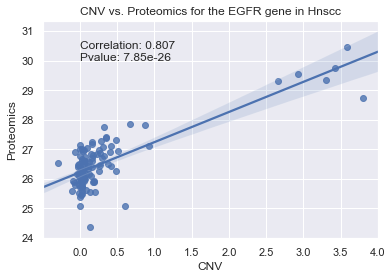

In [148]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df1)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Hnscc')
pval = myTrunc(pval,29)
corr = myTrunc(corr,3)
plt.text(0,30, "Correlation: %s\nPvalue: %s"%(corr,pval))
plt.savefig('EGFR_CNV_Hnscc.png')   
plt.show()

# LSCC

In [149]:
Lscc = cptac.Lscc()

In [152]:
prot_CNV = Lscc.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV = prot_CNV[["EGFR_proteomics","EGFR_CNV"]]
prot_CNV.columns = prot_CNV.columns.droplevel(1)
mutation = Lscc.get_clinical()

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00081.N, C3L-00415.N, C3L-00445.N, C3L-00568.N, C3L-00603.N, C3L-00904.N, C3L-00923.N, C3L-00927.N, C3L-00993.N, C3L-01000.N, C3L-01285.N, C3L-01455.N, C3L-01606.N, C3L-01663.N, C3L-01884.N, C3L-02127.N, C3L-02130.N, C3L-02163.N, C3L-02164.N, C3L-02168.N, C3L-02349.N, C3L-02358.N, C3L-02546.N, C3L-02552.N, C3L-02619.N, C3L-02624.N, C3L-02625.N, C3L-02627.N, C3L-02629.N, C3L-02646.N, C3L-02648.N, C3L-02649.N, C3L-02650.N, C3L-02660.N, C3L-02665.N, C3L-02669.N, C3L-02891.N, C3L-02951.N, C3L-02963.N, C3L-02964.N, C3L-02968.N, C3L-02969.N, C3L-03272.N, C3L-03961.N, C3L-03962.N, C3L-03963.N, C3L-03965.N, C3L-04013.N, C3L-04014.N, C3L-04071.N, C3L-04391.N, C3N-00221.N, C3N-00497.N, C3N-00555.N, C3N-01017.N, C3N-01018.N, C3N-01020.N, C3N-01025.N, C3N-01028.N, C3N-01194.N, C3N-01411.N, C3N-01846.N, C3N-01892.N, C3N-01893.N, C3N-02252.N, C3N-02285.N, C3N-02288.N, C3N-

In [153]:
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
df1 = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
df1 = df1[["EGFR_proteomics","EGFR_CNV","Sample_Tumor_Normal"]]
df1 = df1.dropna(axis=0, how="any")
df1

Name,EGFR_proteomics,EGFR_CNV,Sample_Tumor_Normal
Patient_ID,,,
C3L-00081,1.3122,0.1611,Tumor
C3L-00415,-1.4779,0.0559,Tumor
C3L-00445,0.4224,0.2015,Tumor
C3L-00568,-1.0816,0.0763,Tumor
C3L-00603,1.4508,0.0507,Tumor
...,...,...,...
C3N-03886,-2.5596,-0.0410,Tumor
C3N-04124,-0.3626,0.0682,Tumor
C3N-04127,-1.3431,0.0366,Tumor


In [155]:
x1 = df1[["EGFR_CNV"]].values
y1 = df1[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

corr, pval = scipy.stats.pearsonr(x1,y1)

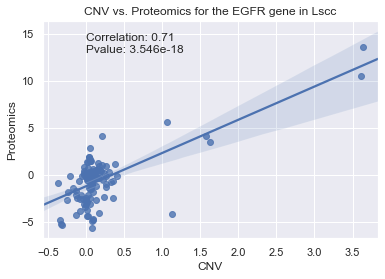

In [157]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df1)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Lscc')
pval = myTrunc(pval,21)
corr = myTrunc(corr,3)
plt.text(0,13, "Correlation: %s\nPvalue: %s"%(corr,pval))
plt.savefig('EGFR_CNV_Lscc.png')   
plt.show()